<a href="https://colab.research.google.com/github/khrnnisak/PCVK_Genap_2023/blob/master/Pertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np



 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


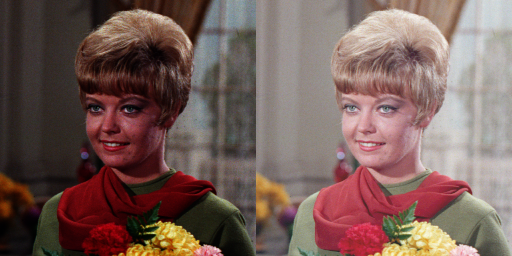

In [3]:
print(' Gamma Correction pada citra ') 
print('----------------------------------') 

def gammaCorrection(src, inputGamma):
  invGamma = 1/inputGamma

  imgGamma = [((i / 255) ** invGamma) * 255 for i in range(256)]
  imgGamma = np.array(imgGamma, np.uint8)
  return cv.LUT(img, imgGamma)

try: 
  inputGamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma = gammaCorrection(img, inputGamma)

final_frame = cv.hconcat((img, gamma))
cv2_imshow(final_frame)

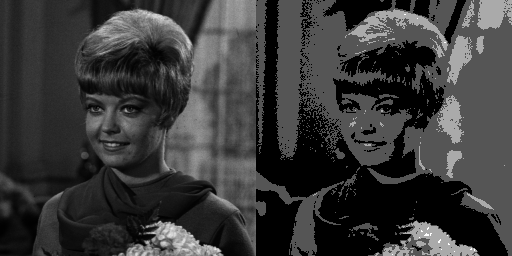

In [4]:
bit_depth=2

level = 255 / (pow(2,bit_depth)-1) 

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original.shape, original.dtype) 

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round(original[i,j] / level) * level


final_frame2 = cv.hconcat((original, depth_image))
cv2_imshow(final_frame2)


In [28]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

def average_denoising(lenght = 5):
  dst = cv_img[0]
  for i in range(lenght):
      if i == 0:
          pass
      else:
          alpha = 1.0 / (i + 1)
          beta = 1.0 - alpha
          dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
          
  final_frame_avg = cv.hconcat((original, dst))
  cv2_imshow(final_frame_avg)
  print('NILAI PSNR ADALAH: ', PSNR(original, dst))
    

AVG Denoise 30


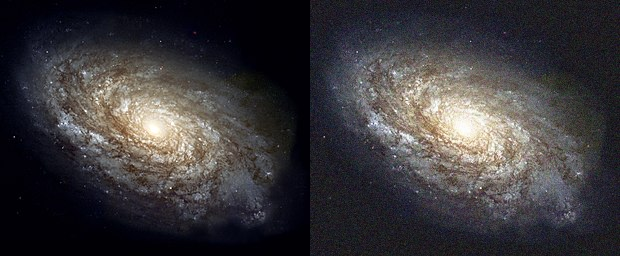

NILAI PSNR ADALAH:  27.541775597318527


In [29]:
print('AVG Denoise 30')
average_denoising(5)

AVG Denoise


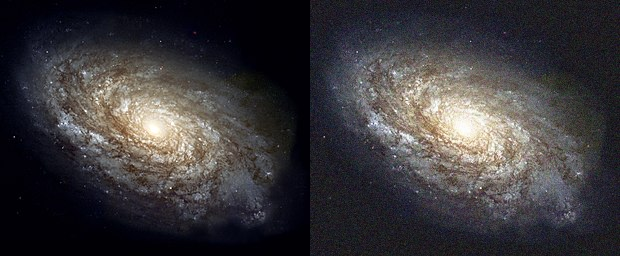

NILAI PSNR ADALAH:  27.541775597318527


In [19]:
print('AVG Denoise')
average_denoising(30)

AVG Denoise


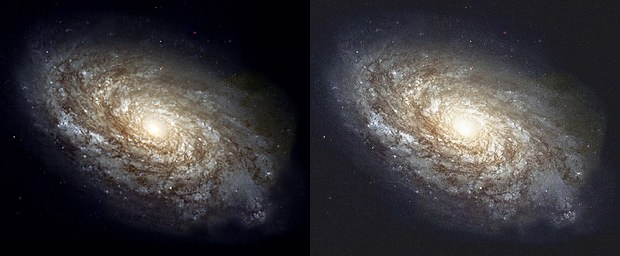

NILAI PSNR ADALAH:  27.49204320397257


In [20]:
print('AVG Denoise')
average_denoising(60)

AVG Denoise


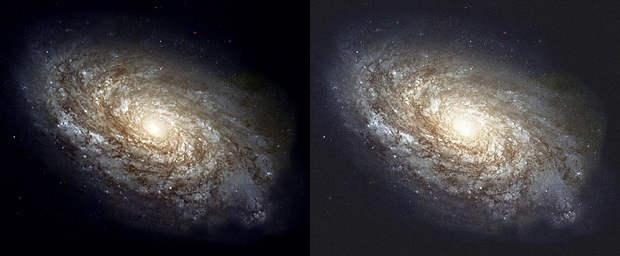

NILAI PSNR ADALAH:  27.506957617381463


In [21]:
print('AVG Denoise')
average_denoising(80)

(256, 256, 3)


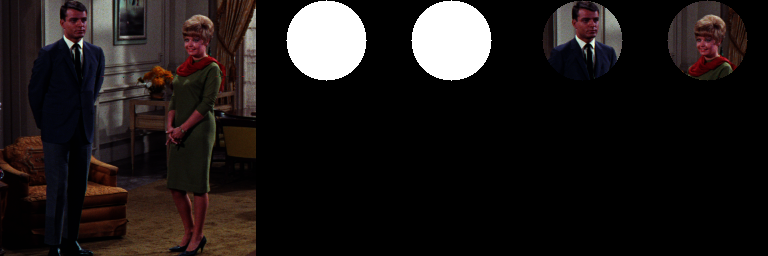

In [37]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
print(img_t.shape)

mask1 = np.zeros(img_t.shape, img_t.dtype)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)
mask = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_t & mask

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

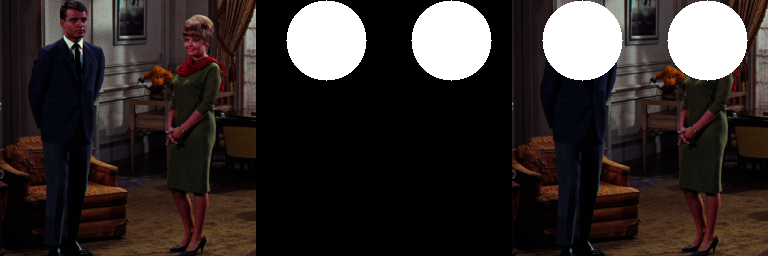

In [38]:
result_or = img_t | mask

final_frame = cv.hconcat((img_t, mask, result_or))
cv2_imshow(final_frame)

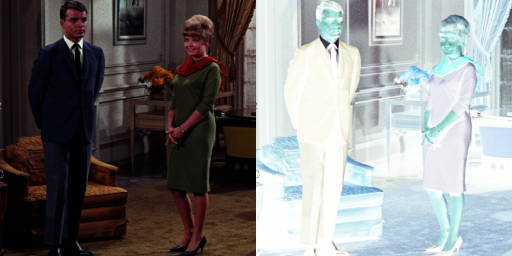

In [41]:
result_not = cv.bitwise_not(img_t)

final_frame = cv.hconcat((img_t,result_not))
cv2_imshow(final_frame)

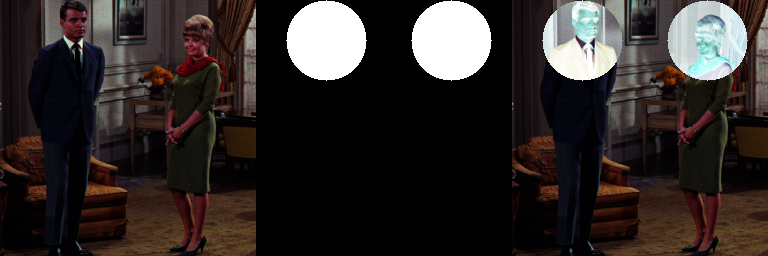

In [46]:
result_xor = cv.bitwise_xor(img_t, mask)

final_frame = cv.hconcat((img_t,mask, result_xor))
cv2_imshow(final_frame)

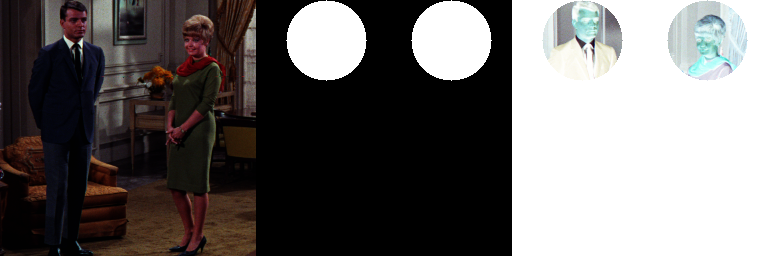

In [45]:
result_nand = cv.bitwise_not(cv.bitwise_and(img_t, mask))

final_frame = cv.hconcat((img_t,mask, result_nand))
cv2_imshow(final_frame)